## WASTE MANAGEMENT USING CNN

In [1]:
#Imported important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_path="dataset/train"
test_path="dataset/test"

In [3]:
#Importing labraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [4]:
#VISUALIZATION
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 12565/12565 [00:04<00:00, 2710.79it/s]


In [5]:
data.shape

(22564, 2)

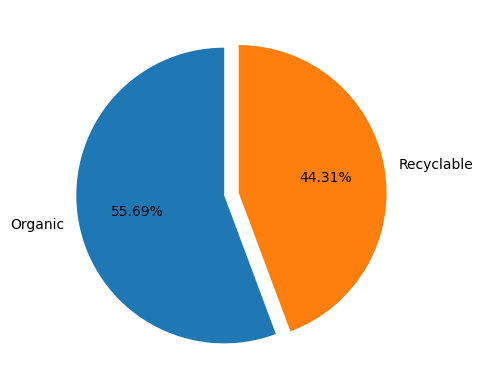

In [6]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',startangle=90,explode=[0.05,0.05])
plt.show()

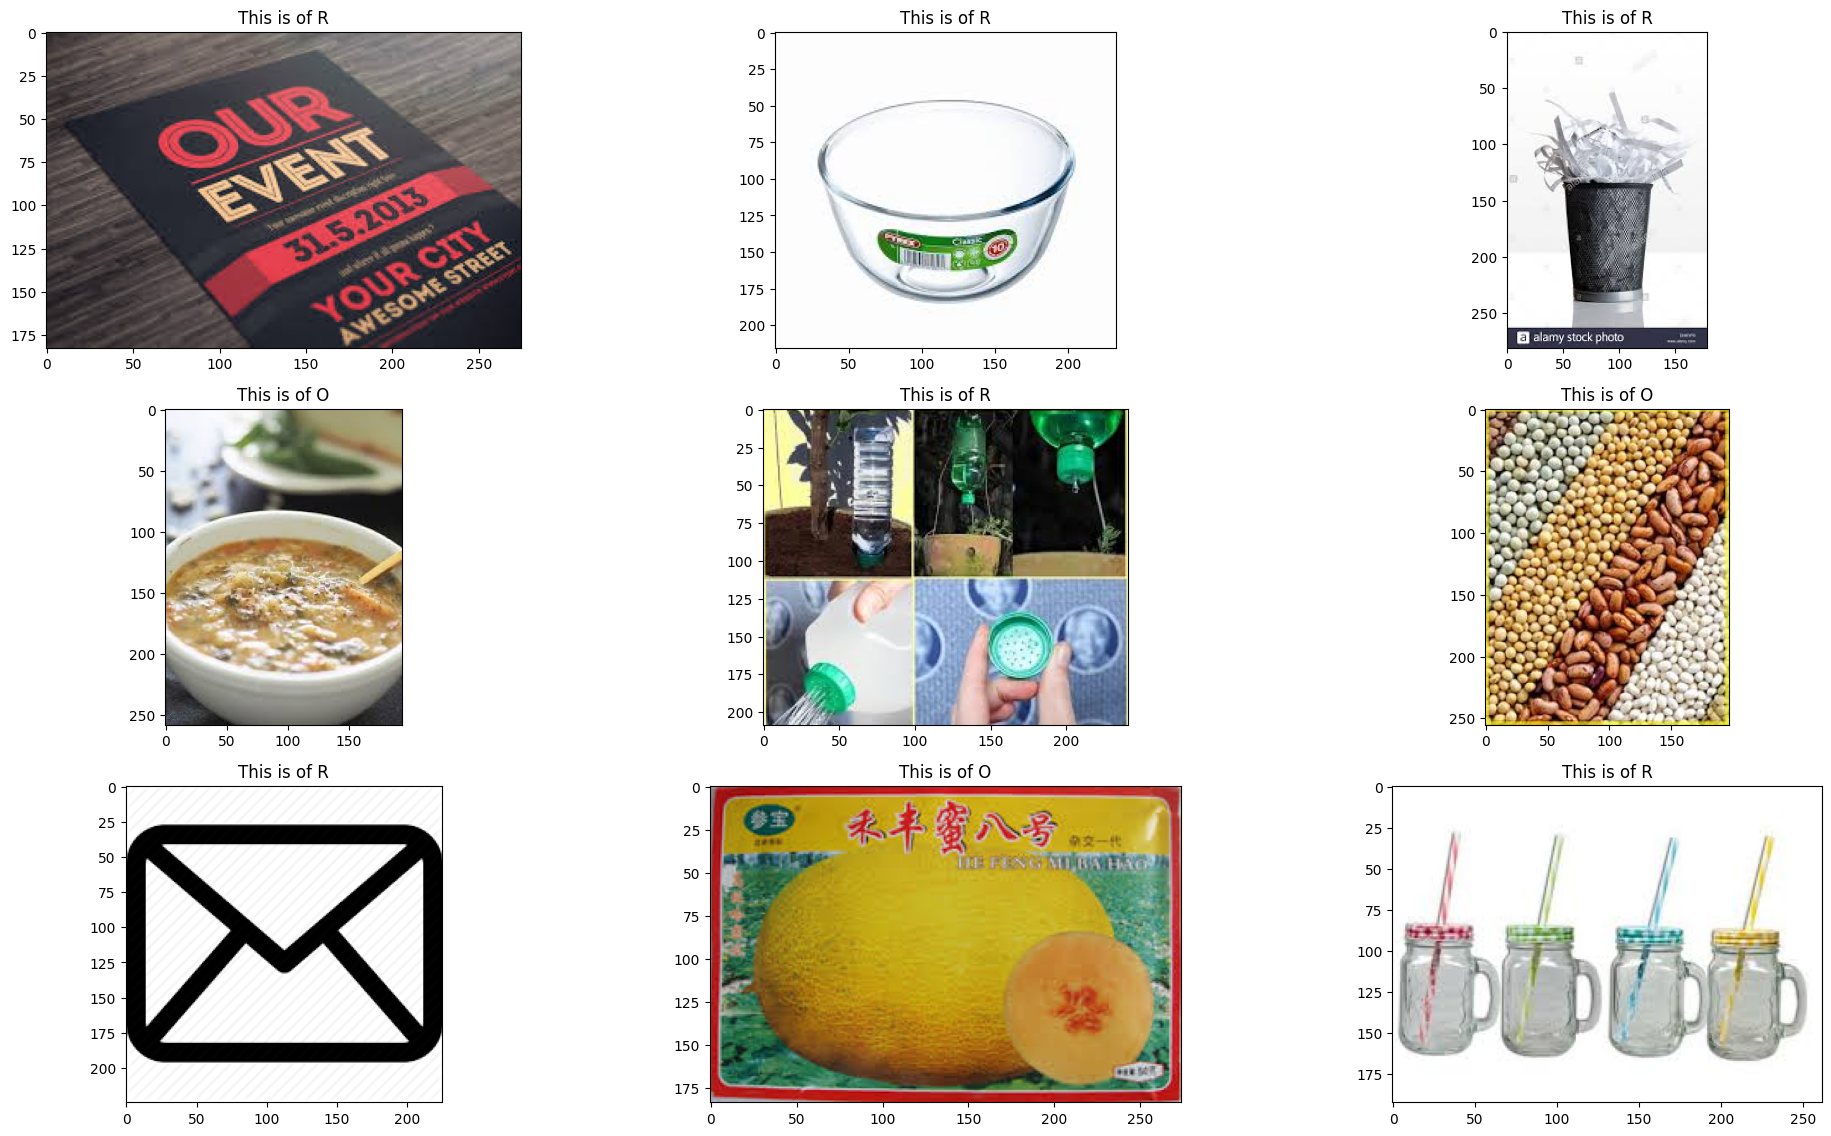

In [7]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [8]:
#import CNN
model=Sequential()
model.add(Conv2D(32,(3,3) ,input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
batch_size=256

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,811,970 (182.39 MB)

 Trainable params: 47,811,970 (182.39 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 404s 5s/step - accuracy: 0.6670 - loss: 1.1419 - val_accuracy: 0.8452 - val_loss: 0.3929
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.8241 - loss: 0.4349 - val_accuracy: 0.8659 - val_loss: 0.3527
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.8470 - loss: 0.3779 - val_accuracy: 0.8591 - val_loss: 0.3434
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.8594 - loss: 0.3493 - val_accuracy: 0.8890 - val_loss: 0.3042
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.8808 - loss: 0.3020 - val_accuracy: 0.8862 - val_loss: 0.3168
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.9002 - loss: 0.2537 - val_accuracy: 0.8563 - val_loss: 0.3823
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.9217 - loss: 0.2072 - val_accuracy: 0.8667 - val_loss: 0.3764
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.9379 - loss: 0.1717 - val_accuracy: 0.8806 - v

In [35]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(test_generator)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 732ms/step - accuracy: 0.8750 - loss: 0.5355
Validation Loss: 0.5120079517364502
Validation Accuracy: 0.8798249363899231


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(actual,predicted)

In [14]:
actual    = np.array(
  ['o','R'])
predicted = np.array(
  ['o','R'])

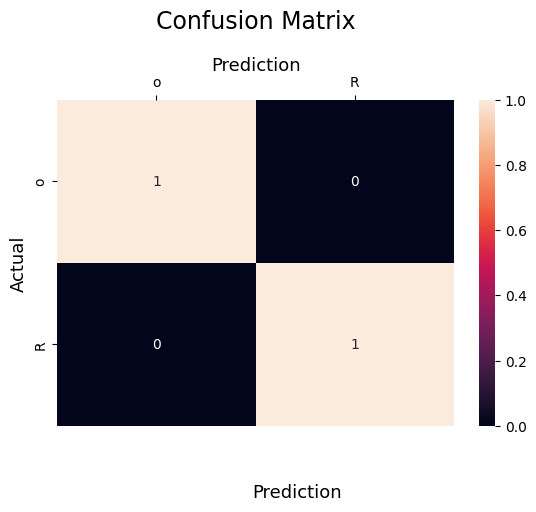

In [29]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['o','R'],
            yticklabels=['o','R'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()